In [12]:
import pandas as pd
import numpy as npy
import matplotlib as plt
import seaborn as sns
import csv
%matplotlib inline

In [14]:
dfavisos = pd.read_csv("TP1/fiuba_6_avisos_detalle.csv")
dfavisos.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [15]:
dfarea = dfavisos[["idaviso","nombre_area"]]
dfarea.head()

,idaviso,nombre_area
0,8725750,Comercial
1,17903700,Salud
2,1000150677,Transporte
3,1000610287,Transporte
4,1000872556,Producción


In [16]:
dfarea.groupby("nombre_area")["idaviso"].count().sort_values(ascending = False).head()

nombre_area
Ventas            1659
Comercial          983
Administración     901
Producción         821
Programación       576
Name: idaviso, dtype: int64

In [54]:
dfventas = dfarea.loc[dfarea["nombre_area"]=="Ventas",]
dfcomercial = dfarea.loc[dfarea["nombre_area"]=="Comercial",]
dfadministracion = dfarea.loc[dfarea["nombre_area"]=="Administración",]
dfproduccion = dfarea.loc[dfarea["nombre_area"]=="Producción",]
dfprogramacion = dfarea.loc[dfarea["nombre_area"]=="Programación",]

In [3]:
dfpost = pd.read_csv("Desktop/fiuba_4_postulaciones.csv")
dfpost.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [5]:
dfpost["fechapostulacion"] = pd.to_datetime(dfpost["fechapostulacion"])
dfpost.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [6]:
dfpost["time"] = dfpost["fechapostulacion"].dt.hour
dfpost.head()

,idaviso,idpostulante,fechapostulacion,time
0,1112257047,NM5M,2018-01-15 16:22:34,16
1,1111920714,NM5M,2018-02-06 09:04:50,9
2,1112346945,NM5M,2018-02-22 09:04:47,9
3,1112345547,NM5M,2018-02-22 09:04:59,9
4,1112237522,5awk,2018-01-25 18:55:03,18


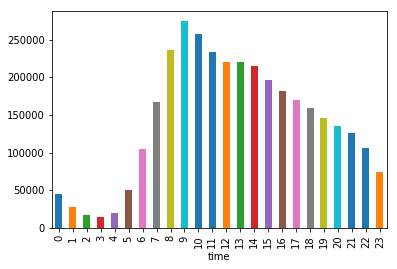

In [7]:
dfpost.groupby("time")["idpostulante"].count().plot(kind = "bar")

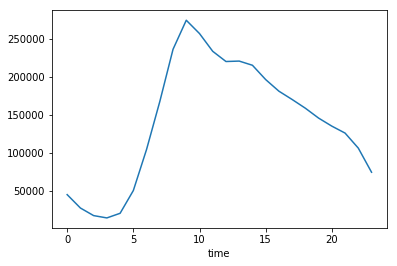

In [9]:
dfpost.groupby("time")["idpostulante"].count().plot()

In [13]:
dfpostsinfecha = dfpost[["idaviso","idpostulante","time"]]
dfpostsinfecha.head()

,idaviso,idpostulante,time
0,1112257047,NM5M,16
1,1111920714,NM5M,9
2,1112346945,NM5M,9
3,1112345547,NM5M,9
4,1112237522,5awk,18


In [57]:
dfpostventas = pd.merge(dfpostsinfecha,dfventas,how="inner")
dfpostcomercial = pd.merge(dfpostsinfecha,dfcomercial,how="inner")
dfpostadministracion = pd.merge(dfpostsinfecha,dfadministracion,how="inner")
dfpostproduccion = pd.merge(dfpostsinfecha,dfproduccion,how="inner")
dfpostprogramacion = pd.merge(dfpostsinfecha,dfprogramacion,how="inner")

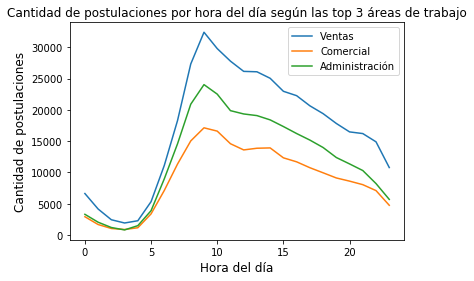

In [92]:
g = dfpostventas.groupby("time")["idpostulante"].count().plot()
g = dfpostcomercial.groupby("time")["idpostulante"].count().plot()
g = dfpostadministracion.groupby("time")["idpostulante"].count().plot()
#g = dfpostproduccion.groupby("time")["idpostulante"].count().plot()
#g = dfpostprogramacion.groupby("time")["idpostulante"].count().plot()
g.set_title("Cantidad de postulaciones por hora del día según las top 3 áreas de trabajo")
g.set_xlabel("Hora del día", fontsize = 12)
g.set_ylabel("Cantidad de postulaciones", fontsize = 12)
g.legend(["Ventas","Comercial","Administración"])#,"Producción"])